In [1]:
import seaborn as sns
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd

from scipy import stats

In [2]:
all_targets = pd.read_csv('../data/0&1/sampled_sum_targets_with_panic.csv')

In [3]:
all_targets_copied = all_targets.copy()
total = all_targets_copied['total']

In [4]:
total.value_counts()

2.0    38
5.0    38
1.0    38
3.0    38
4.0    38
6.0    38
Name: total, dtype: int64

Text(0.5, 1.0, 'Screen Time and Mental Health')

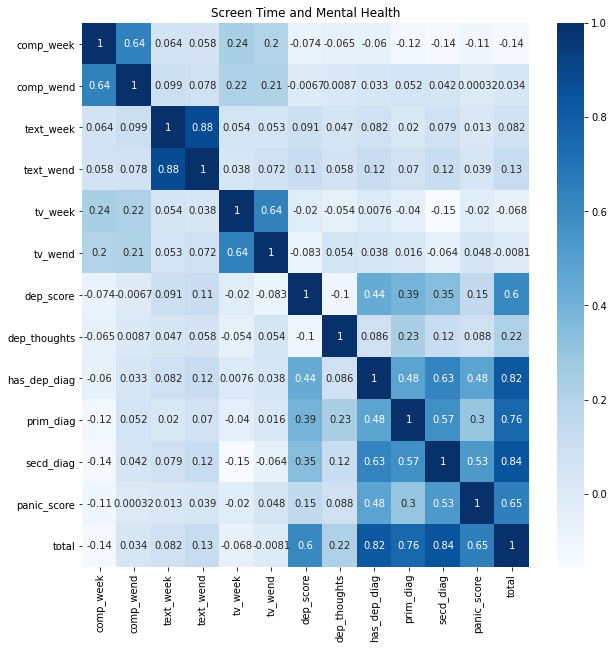

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))

X_ds = all_targets.copy()
ds = X_ds.corr()
sns.heatmap(ds, annot=True, cmap="Blues")

ax.set_title('Screen Time and Mental Health')

## between y targets

In [6]:
# p-value < 0.05 == confident 
# "A p-value less than 0.05 (typically ≤ 0.05) is statistically significant"

print(stats.pearsonr(X_ds.dep_score, X_ds.dep_score))
print(stats.pearsonr(X_ds.dep_score, X_ds.dep_thoughts))
print(stats.pearsonr(X_ds.dep_score, X_ds.has_dep_diag))
print(stats.pearsonr(X_ds.dep_score, X_ds.prim_diag))
print(stats.pearsonr(X_ds.dep_score, X_ds.secd_diag))
print(stats.pearsonr(X_ds.dep_score, X_ds.panic_score))

(1.0, 0.0)
(-0.10034856730082563, 0.13086038602155312)
(0.4387966937749201, 3.793231880479728e-12)
(0.3926887967310393, 7.969958649301069e-10)
(0.34534235712067474, 8.725453943029013e-08)
(0.15081518377156425, 0.022739287731971168)


## between Xs and dep_score

In [7]:
print(stats.pearsonr(X_ds.dep_score, X_ds.comp_week))
print(stats.pearsonr(X_ds.dep_score, X_ds.comp_wend))
print(stats.pearsonr(X_ds.dep_score, X_ds.text_week))
print(stats.pearsonr(X_ds.dep_score, X_ds.text_wend))
print(stats.pearsonr(X_ds.dep_score, X_ds.tv_week))
print(stats.pearsonr(X_ds.dep_score, X_ds.tv_wend))

(-0.07394392396083257, 0.26617476844312893)
(-0.006714942431492535, 0.9196796554002243)
(0.09129264278690372, 0.16950922473524993)
(0.11477481415786235, 0.08376341066428025)
(-0.01965517276766482, 0.7678534142101446)
(-0.08303034953415472, 0.2116659342082621)


## between Xs and dep_thoughts

In [8]:
print(stats.pearsonr(X_ds.dep_thoughts, X_ds.comp_week))
print(stats.pearsonr(X_ds.dep_thoughts, X_ds.comp_wend))
print(stats.pearsonr(X_ds.dep_thoughts, X_ds.text_week))
print(stats.pearsonr(X_ds.dep_thoughts, X_ds.text_wend))
print(stats.pearsonr(X_ds.dep_thoughts, X_ds.tv_week))
print(stats.pearsonr(X_ds.dep_thoughts, X_ds.tv_wend))

(-0.06526317321591207, 0.3265521668289085)
(0.008699509662973788, 0.8960599484539425)
(0.04741627776624484, 0.4761949977684132)
(0.05778004780418239, 0.3851808606259503)
(-0.05371690734561846, 0.41953259577319957)
(0.05445440715525336, 0.41316787944445127)


## between Xs and has_dep_diag

In [9]:
print(stats.pearsonr(X_ds.has_dep_diag, X_ds.comp_week))
print(stats.pearsonr(X_ds.has_dep_diag, X_ds.comp_wend))
print(stats.pearsonr(X_ds.has_dep_diag, X_ds.text_week))
print(stats.pearsonr(X_ds.has_dep_diag, X_ds.text_wend))
print(stats.pearsonr(X_ds.has_dep_diag, X_ds.tv_week))
print(stats.pearsonr(X_ds.has_dep_diag, X_ds.tv_wend))

(-0.060086777408596255, 0.3664622193978078)
(0.03255564530653791, 0.6248365764955334)
(0.0822669424055096, 0.21591090389487802)
(0.11582031257094846, 0.08096507642939847)
(0.007568919382534708, 0.9095060241483591)
(0.03776629642716403, 0.5704922503280865)


## between Xs and prim_diag

In [10]:
print(stats.pearsonr(X_ds.prim_diag, X_ds.comp_week))
print(stats.pearsonr(X_ds.prim_diag, X_ds.comp_wend))
print(stats.pearsonr(X_ds.prim_diag, X_ds.text_week))
print(stats.pearsonr(X_ds.prim_diag, X_ds.text_wend))
print(stats.pearsonr(X_ds.prim_diag, X_ds.tv_week))
print(stats.pearsonr(X_ds.prim_diag, X_ds.tv_wend))

(-0.12023915862765158, 0.06995953323127418)
(0.05184468907310897, 0.4359449611325428)
(0.020404957687854608, 0.7592646704744098)
(0.07008994780897962, 0.2919678036059468)
(-0.03972469514443804, 0.5506619518578916)
(0.015521894744885413, 0.8156827386637348)


## between Xs and secd_diag

In [11]:
print(stats.pearsonr(X_ds.secd_diag, X_ds.comp_week))
print(stats.pearsonr(X_ds.secd_diag, X_ds.comp_wend))
print(stats.pearsonr(X_ds.secd_diag, X_ds.text_week))
print(stats.pearsonr(X_ds.secd_diag, X_ds.text_wend))
print(stats.pearsonr(X_ds.secd_diag, X_ds.tv_week))
print(stats.pearsonr(X_ds.secd_diag, X_ds.tv_wend))

(-0.13945850221247375, 0.035335028396701294)
(0.04218604440550185, 0.5262267680508145)
(0.0785143538962338, 0.23766295425702091)
(0.11775361885578686, 0.07598934859485626)
(-0.1546083447241216, 0.019503463713810374)
(-0.06392148170175951, 0.3366169196960973)


## between Xs and panic_score

In [12]:
print(stats.pearsonr(X_ds.panic_score, X_ds.comp_week))
print(stats.pearsonr(X_ds.panic_score, X_ds.comp_wend))
print(stats.pearsonr(X_ds.panic_score, X_ds.text_week))
print(stats.pearsonr(X_ds.panic_score, X_ds.text_wend))
print(stats.pearsonr(X_ds.panic_score, X_ds.tv_week))
print(stats.pearsonr(X_ds.panic_score, X_ds.tv_wend))

(-0.10940622268555006, 0.09937974696428306)
(0.00032319254935273987, 0.9961276597076475)
(0.013403068478724847, 0.8404807517391859)
(0.03917814127444289, 0.5561621906988854)
(-0.01993053644763996, 0.7646957855057167)
(0.047871142354475094, 0.4719696857144861)
